In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**bold text**# Hour 5: Discovering Hidden Relationships with Apriori 🛒

## 1. Introduction to Association Rule Learning

Association rule learning is a technique used to discover interesting relationships or associations among variables in large datasets. It's often used in market basket analysis to find patterns of items that are frequently purchased together.

**Key Concepts:**

* **Itemset:** A collection of one or more items.
* **Association Rule:** An implication of the form {A} -> {B}, where A and B are itemsets.
* **Support:** The proportion of transactions that contain an itemset.
* **Confidence:** The proportion of transactions containing A that also contain B.
* **Lift:** The ratio of the observed support to that expected if A and B were independent.

**Why is this important?** Association rule learning can reveal hidden patterns in data, leading to valuable insights for business decisions, such as product placement, cross-selling, and recommendations.

## 2. Apriori Algorithm: Finding Frequent Itemsets

The Apriori algorithm is a classic algorithm for association rule learning. It leverages the Apriori principle, which states that if an itemset is frequent, then all of its subsets must also be frequent.

**Steps:**

1.  **Generate Candidate Itemsets:** Generate candidate itemsets of size k+1 from frequent itemsets of size k.
2.  **Calculate Support:** Calculate the support for each candidate itemset.
3.  **Prune Infrequent Itemsets:** Remove candidate itemsets with support below a minimum support threshold.
4.  **Repeat:** Repeat steps 1-3 until no more frequent itemsets can be found.

**Example:**

Suppose we have a dataset of grocery transactions. The Apriori algorithm can find frequent itemsets like {bread, milk} and {diapers, beer}.

## 3. Generating Association Rules

Once frequent itemsets are identified, association rules can be generated.

**Steps:**

1.  **Generate Candidate Rules:** For each frequent itemset, generate candidate rules by splitting the itemset into antecedent and consequent.
2.  **Calculate Confidence:** Calculate the confidence for each candidate rule.
3.  **Prune Low-Confidence Rules:** Remove rules with confidence below a minimum confidence threshold.
4.  **Calculate Lift:** Calculate the lift for the remaining rules to assess their strength.

**Example:**

From the frequent itemset {bread, milk}, we can generate rules like {bread} -> {milk} and {milk} -> {bread}.

## 4. Practical Implementation with Python

We'll use the `mlxtend` library to implement the Apriori algorithm and visualize the results.

```python
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

# Transform the dataset
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

# Calculate num_itemsets
num_itemsets = len(df.columns)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7, num_itemsets=num_itemsets)

print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)

# Visualizations
# Support vs. Confidence
plt.figure(figsize=(8, 6))
sns.scatterplot(x="support", y="confidence", data=rules)
plt.title("Support vs. Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

# Lift vs. Confidence
plt.figure(figsize=(8, 6))
sns.scatterplot(x="lift", y="confidence", data=rules)
plt.title("Lift vs. Confidence")
plt.xlabel("Lift")
plt.ylabel("Confidence")
plt.show()

# Support vs. Lift
plt.figure(figsize=(8, 6))
sns.scatterplot(x="support", y="lift", data=rules)
plt.title("Support vs. Lift")
plt.xlabel("Support")
plt.ylabel("Lift")
plt.show()
```

**Explanation of Visualizations:**

1.  **Support vs. Confidence:**
    * This scatter plot displays the relationship between the `support` and `confidence` metrics of the generated association rules.
    * It's useful for identifying rules that have both high `support` (frequent occurrence) and high `confidence` (strong implication).
    * Rules in the upper right quadrant of the plot are generally considered to be the most valuable.

2.  **Lift vs. Confidence:**
    * This scatter plot shows the relationship between the `lift` and `confidence` of the rules.
    * `Lift` measures how much more likely the consequent is purchased when the antecedent is purchased, compared to their independent occurrences.
    * Rules with high `lift` and high `confidence` suggest strong, non-random associations.

3.  **Support vs. Lift:**
    * This scatter plot displays the relationship between the `support` and `lift` of the rules.
    * It helps to find rules that are both frequently occurring (high `support`) and statistically significant (high `lift`).
    * This visualization is helpful in filtering out rules that might have high confidence but low statistical significance due to low lift.

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

# Transform the dataset
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

# Calculate num_itemsets
num_itemsets = len(df.columns)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7, num_itemsets=num_itemsets)

print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)



Frequent Itemsets:
    support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Eggs, Kidney Beans)
6       0.6                (Onion, Eggs)
7       0.6         (Milk, Kidney Beans)
8       0.6        (Onion, Kidney Beans)
9       0.6       (Yogurt, Kidney Beans)
10      0.6  (Onion, Eggs, Kidney Beans)

Association Rules:
              antecedents            consequents  antecedent support  \
0                  (Eggs)         (Kidney Beans)                 0.8   
1          (Kidney Beans)                 (Eggs)                 1.0   
2                 (Onion)                 (Eggs)                 0.6   
3                  (Eggs)                (Onion)                 0.8   
4                  (Milk)         (Kidney Beans)                 0.6   
5                 (Onion)         (Ki

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


## 5. Applications and Considerations

**Applications:**

* **Market Basket Analysis:** Identifying product associations for cross-selling.
* **Recommendation Systems:** Suggesting items based on user purchase history.
* **Medical Diagnosis:** Finding associations between symptoms and diseases.
* **Web Usage Mining:** Discovering patterns in user browsing behavior.

**Considerations:**

* **Minimum Support and Confidence:** Choosing appropriate thresholds is crucial.
* **Large Datasets:** The Apriori algorithm can be computationally expensive for large datasets.
* **Spurious Rules:** Some rules may be coincidental and not meaningful.

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample dataset
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

# Transform the dataset
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

# Calculate num_itemsets
num_itemsets = len(df.columns)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7, num_itemsets=num_itemsets)

print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
    support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Eggs, Kidney Beans)
6       0.6                (Onion, Eggs)
7       0.6         (Milk, Kidney Beans)
8       0.6        (Onion, Kidney Beans)
9       0.6       (Yogurt, Kidney Beans)
10      0.6  (Onion, Eggs, Kidney Beans)

Association Rules:
              antecedents            consequents  antecedent support  \
0                  (Eggs)         (Kidney Beans)                 0.8   
1          (Kidney Beans)                 (Eggs)                 1.0   
2                 (Onion)                 (Eggs)                 0.6   
3                  (Eggs)                (Onion)                 0.8   
4                  (Milk)         (Kidney Beans)                 0.6   
5                 (Onion)         (Ki

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


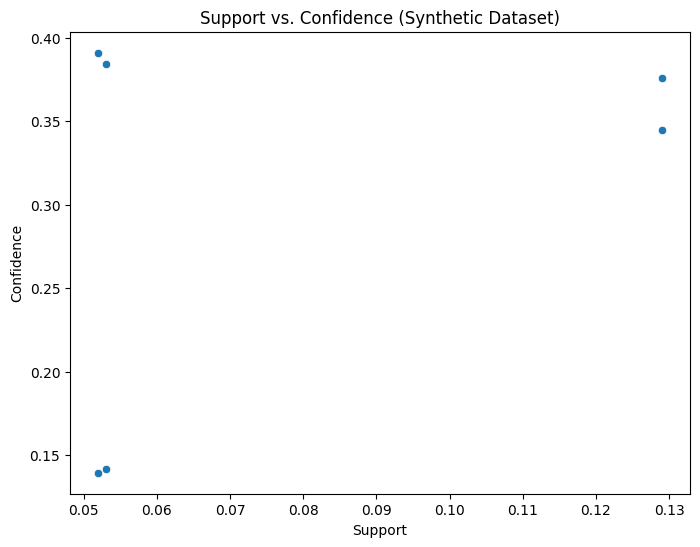

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


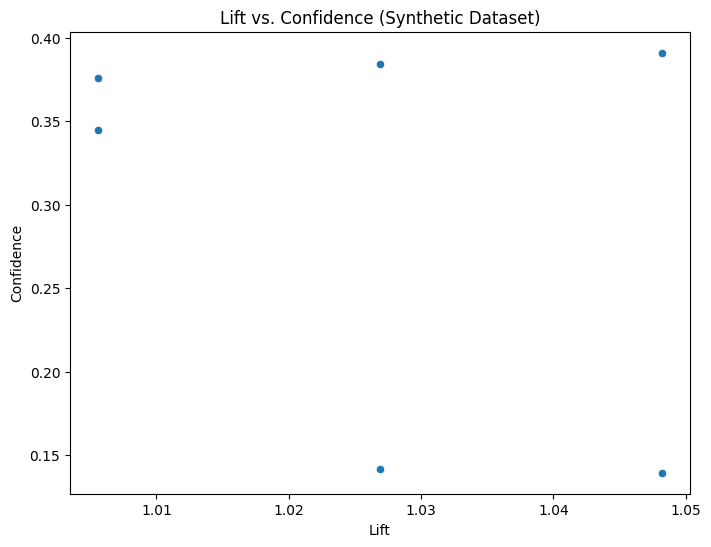

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


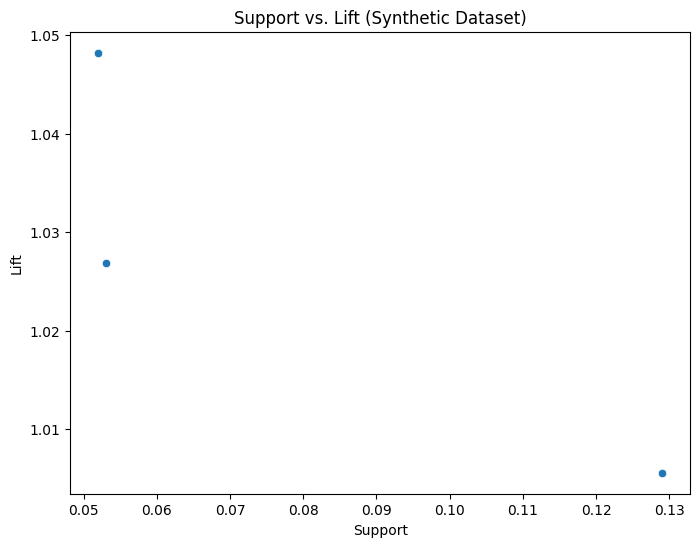

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


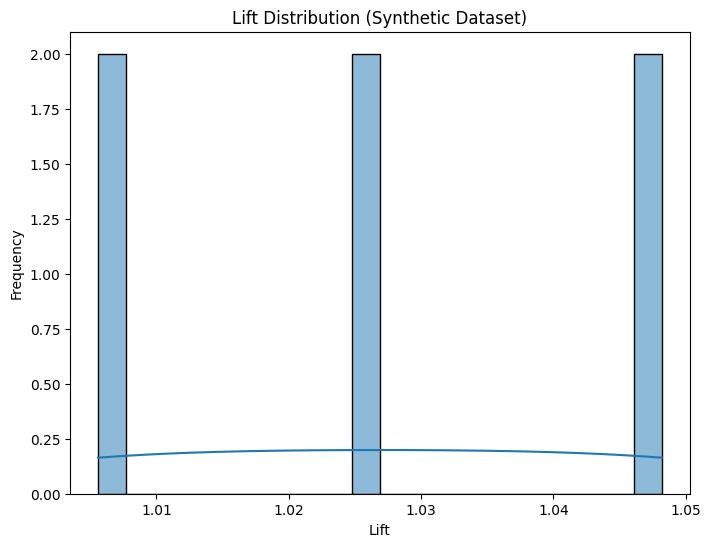

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate a larger synthetic dataset
np.random.seed(0)
num_transactions = 1000
items = ['Milk', 'Bread', 'Eggs', 'Butter', 'Apples', 'Beer', 'Diapers', 'Chips', 'Soda']
dataset = []
for _ in range(num_transactions):
    transaction = np.random.choice(items, size=np.random.randint(2, 6), replace=False).tolist()
    dataset.append(transaction)

# Transform the dataset
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Calculate num_itemsets
num_itemsets = len(df.columns)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=num_itemsets)

# Visualizations
# Support vs. Confidence
plt.figure(figsize=(8, 6))
sns.scatterplot(x="support", y="confidence", data=rules)
plt.title("Support vs. Confidence (Synthetic Dataset)")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

# Lift vs. Confidence
plt.figure(figsize=(8, 6))
sns.scatterplot(x="lift", y="confidence", data=rules)
plt.title("Lift vs. Confidence (Synthetic Dataset)")
plt.xlabel("Lift")
plt.ylabel("Confidence")
plt.show()

# Support vs. Lift
plt.figure(figsize=(8, 6))
sns.scatterplot(x="support", y="lift", data=rules)
plt.title("Support vs. Lift (Synthetic Dataset)")
plt.xlabel("Support")
plt.ylabel("Lift")
plt.show()

# Additional Visualization: Lift Distribution
plt.figure(figsize=(8, 6))
sns.histplot(rules['lift'], bins=20, kde=True)
plt.title("Lift Distribution (Synthetic Dataset)")
plt.xlabel("Lift")
plt.ylabel("Frequency")
plt.show()